**Import**

In [1]:
import pandas as pd

**Dataset**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Grammar Correction.csv', sep=',')
print(f'Shape of data= {df.shape}')

Shape of data= (2018, 4)


In [3]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


**Initial Data Analysis**

In [4]:
summary = df.describe(include='all')
summary

,Serial Number,Error Type,Ungrammatical Statement,Standard English
count,2018.000000,2018,2018,2018
unique,NaN,36,2016,2009
top,NaN,Sentence Structure Errors,The plants needs to be watered every day.,The Earth revolves around the Sun.
freq,NaN,103,2,2
mean,1009.500000,NaN,NaN,NaN
std,582.690741,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,505.250000,NaN,NaN,NaN
50%,1009.500000,NaN,NaN,NaN
75%,1513.750000,NaN,NaN,NaN


In [5]:
missing_values = df.isnull().sum()
missing_values

Serial Number              0
Error Type                 0
Ungrammatical Statement    0
Standard English           0
dtype: int64

**Data Cleaning**

In [6]:
df_clean = df.drop_duplicates()
print(f'Shape of df_clean= {df_clean.shape}')

Shape of df_clean= (2018, 4)


In [7]:
df_clean['Ungrammatical Statement'] = df_clean['Ungrammatical Statement'].str.strip()
df_clean['Standard English'] = df_clean['Standard English'].str.strip()

In [8]:
df_clean['Ungrammatical Statement'] = df_clean['Ungrammatical Statement'].str.replace(r'^\d+\.\s+', '', regex=True)
df_clean['Standard English'] = df_clean['Standard English'].str.replace(r'^\d+\.\s+', '', regex=True)

In [9]:
print(f'Shape of df_clean= {df_clean.shape}')

Shape of df_clean= (2018, 4)


**Exploratory Data Analysis**

In [10]:
error_counts = df_clean['Error Type'].value_counts()
error_counts

Sentence Structure Errors                         103
Verb Tense Errors                                 100
Subject-Verb Agreement                            100
Article Usage                                     100
Spelling Mistakes                                 100
Preposition Usage                                  95
Punctuation Errors                                 60
Relative Clause Errors                             51
Gerund and Participle Errors                       50
Abbreviation Errors                                50
Slang, Jargon, and Colloquialisms                  50
Negation Errors                                    50
Incorrect Auxiliaries                              50
Ambiguity                                          50
Tautology                                          50
Lack of Parallelism in Lists or Series             50
Mixed Metaphors/Idioms                             50
Parallelism Errors                                 49
Contractions Errors         

In [11]:
df_clean['Ungrammatical Length'] = df_clean['Ungrammatical Statement'].apply(len)
df_clean['Standard Length'] = df_clean['Standard English'].apply(len)

In [12]:
df_clean.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set_style("whitegrid")

Text(0, 0.5, 'Error Type')

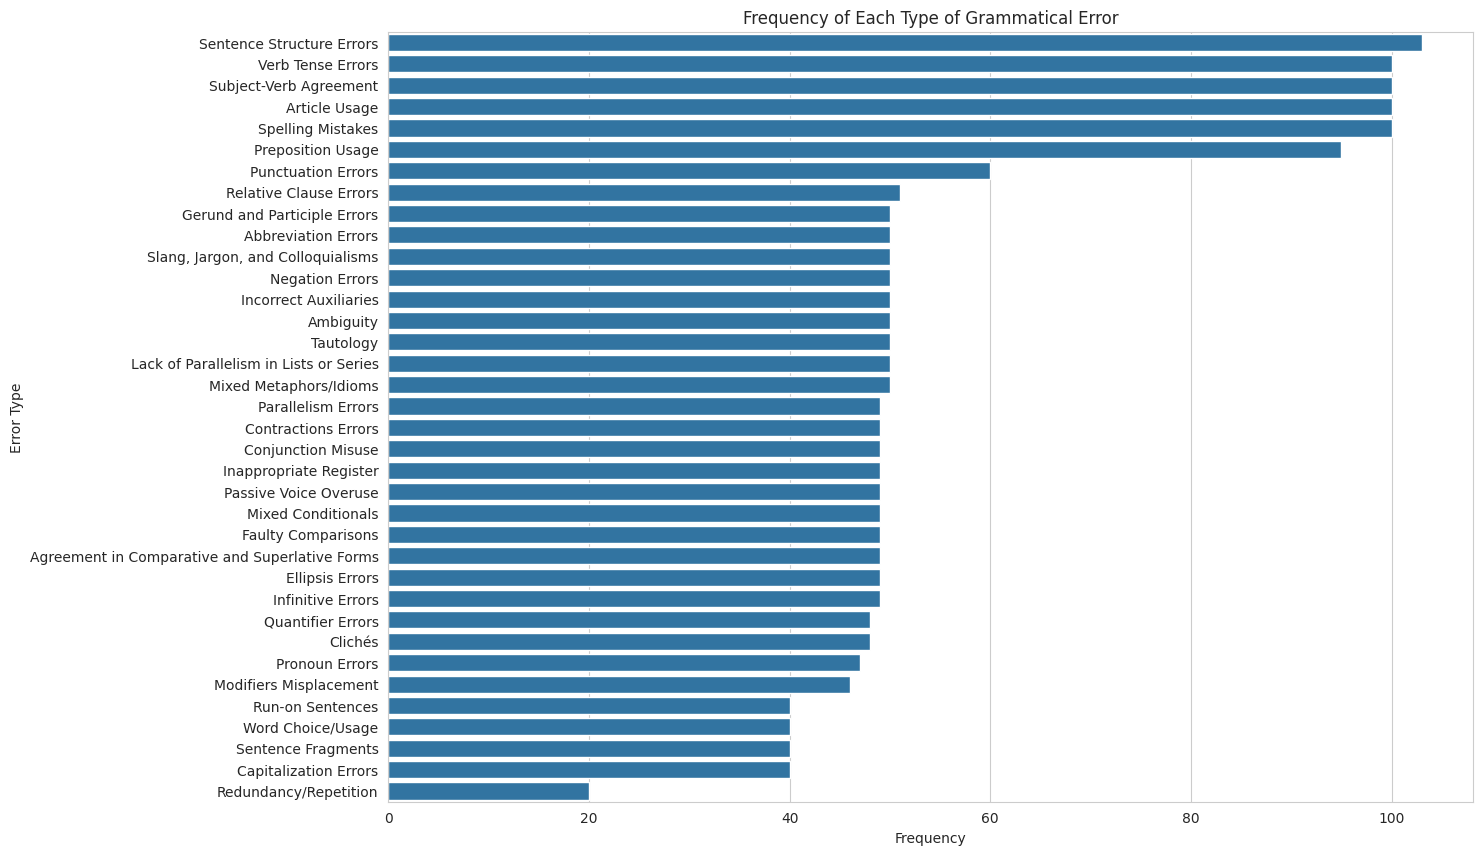

In [15]:
plt.figure(figsize=(14, 10))
error_type_plot = sns.countplot(y=df_clean['Error Type'], order=df_clean['Error Type'].value_counts().index)
error_type_plot.set_title('Frequency of Each Type of Grammatical Error')
error_type_plot.set_xlabel('Frequency')
error_type_plot.set_ylabel('Error Type')

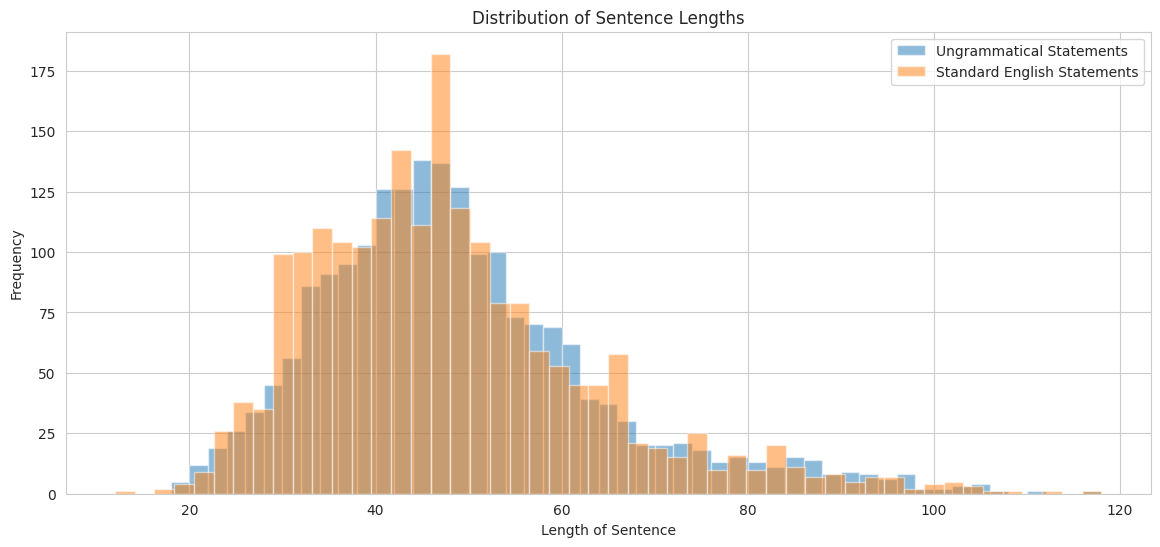

In [16]:
plt.figure(figsize=(14, 6))
plt.hist(df_clean['Ungrammatical Length'], bins=50, alpha=0.5, label='Ungrammatical Statements')
plt.hist(df_clean['Standard Length'], bins=50, alpha=0.5, label='Standard English Statements')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.legend()


plt.show()

In [17]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Calculate word frequency
def word_frequency(sentences):
    words = []
    for sentence in sentences:
        words.extend(word_tokenize(sentence.lower()))
    return Counter(words)

# Calculate word frequency for both ungrammatical and corrected statements
ungrammatical_freq = word_frequency(df_clean['Ungrammatical Statement'])
corrected_freq = word_frequency(df_clean['Standard English'])

# Get the top 20 most frequent words in each category
top_ungrammatical = ungrammatical_freq.most_common(20)
top_corrected = corrected_freq.most_common(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


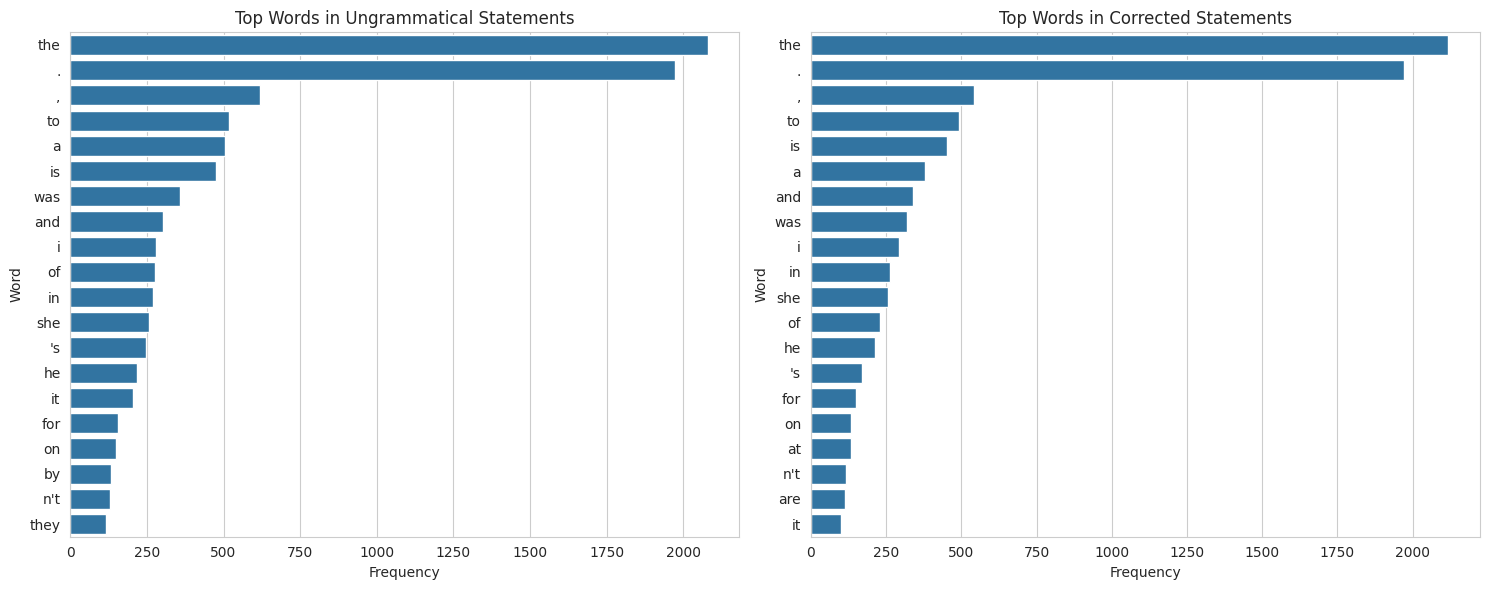

Top Words in Ungrammatical Statements:
    Word  Frequency
0    the       2079
1      .       1973
2      ,        619
3     to        518
4      a        504
5     is        475
6    was        357
7    and        304
8      i        279
9     of        277
10    in        270
11   she        258
12    's        246
13    he        217
14    it        204
15   for        155
16    on        148
17    by        132
18   n't        131
19  they        118

Top Words in Corrected Statements:
   Word  Frequency
0   the       2118
1     .       1972
2     ,        542
3    to        493
4    is        453
5     a        379
6   and        341
7   was        321
8     i        293
9    in        263
10  she        256
11   of        230
12   he        214
13   's        170
14  for        151
15   on        134
16   at        133
17  n't        117
18  are        112
19   it        101


In [18]:
top_ungrammatical_df = pd.DataFrame(top_ungrammatical, columns=['Word', 'Frequency'])
top_corrected_df = pd.DataFrame(top_corrected, columns=['Word', 'Frequency'])

# Bar Graphs
plt.figure(figsize=(15, 6))

# Ungrammatical Statements
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=top_ungrammatical_df)
plt.title('Top Words in Ungrammatical Statements')

# Corrected Statements
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=top_corrected_df)
plt.title('Top Words in Corrected Statements')

plt.tight_layout()
plt.show()

# Displaying in Table Format
print("Top Words in Ungrammatical Statements:")
print(top_ungrammatical_df)

print("\nTop Words in Corrected Statements:")
print(top_corrected_df)

In [19]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging
def pos_tag_sentences(sentences):
    tagged_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged = pos_tag(tokens)
        tagged_sentences.extend(tagged)
    return tagged_sentences

# POS tagging for ungrammatical and corrected sentences
tagged_ungrammatical = pos_tag_sentences(df_clean['Ungrammatical Statement'])
tagged_corrected = pos_tag_sentences(df_clean['Standard English'])

# Count the frequency of each POS tag
ungrammatical_pos_counts = pd.Series([tag for _, tag in tagged_ungrammatical]).value_counts()
corrected_pos_counts = pd.Series([tag for _, tag in tagged_corrected]).value_counts()

# Display or visualize the results
print(ungrammatical_pos_counts)
print(corrected_pos_counts)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


NN      3828
DT      2877
.       2021
IN      1578
PRP     1307
JJ      1158
VBZ      972
NNS      938
VBD      868
VB       736
,        619
RB       588
TO       526
VBG      474
VBP      466
VBN      429
CC       422
PRP$     284
MD       227
NNP      209
POS      101
CD       101
RBR       79
JJR       70
:         53
WRB       52
RBS       47
RP        34
JJS       31
''        19
WDT       17
EX        15
WP        15
PDT        5
``         3
(          1
)          1
NNPS       1
dtype: int64
NN      3666
DT      2769
.       2023
IN      1523
PRP     1162
JJ      1093
VBD      948
NNS      917
VBZ      878
VB       658
RB       550
,        542
VBG      525
TO       493
CC       432
VBP      412
VBN      385
PRP$     380
NNP      287
MD       200
CD       100
POS       80
JJR       61
WRB       59
RBR       57
JJS       44
:         35
RP        30
WP        27
WDT       22
EX        17
PDT       17
``         5
''         5
NNPS       5
(          3
)          3
RBS        2

<Figure size 2000x1000 with 0 Axes>

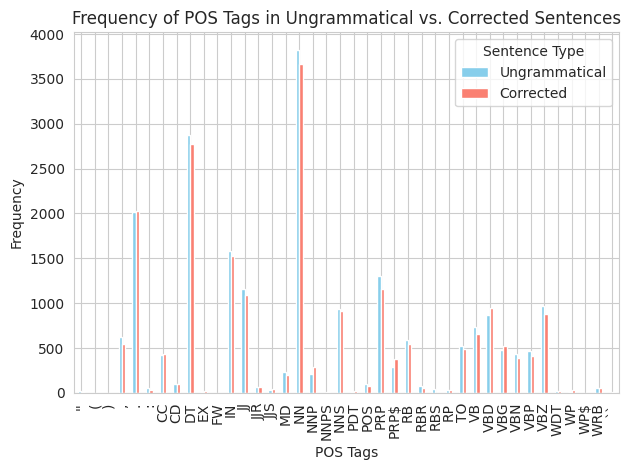

In [20]:
pos_df = pd.DataFrame({
    'Ungrammatical': ungrammatical_pos_counts,
    'Corrected': corrected_pos_counts
}).fillna(0)

# Plot
plt.figure(figsize=(20, 10))  # Adjust the size as necessary
pos_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Frequency of POS Tags in Ungrammatical vs. Corrected Sentences')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

In [21]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.4 MB/s eta 0:00:00


In [22]:
import textstat

# Compute the readability scores for ungrammatical sentences
ungrammatical_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_clean['Ungrammatical Statement']]

# Compute the readability scores for corrected sentences
corrected_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_clean['Standard English']]

# Calculate the average score for each or compare scores sentence by sentence
avg_ungrammatical_score = sum(ungrammatical_readability) / len(ungrammatical_readability)
avg_corrected_score = sum(corrected_readability) / len(corrected_readability)

# Output the average Flesch Reading Ease scores
print(f'Average Readability Score for Ungrammatical Sentences: {avg_ungrammatical_score}')
print(f'Average Readability Score for Corrected Sentences: {avg_corrected_score}')

Average Readability Score for Ungrammatical Sentences: 82.42183845391477
Average Readability Score for Corrected Sentences: 80.11340931615477


In [23]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.7 MB/s eta 0:00:00


In [24]:
import numpy as np
from Levenshtein import distance as levenshtein_distance

# Assuming `ungrammatical_sentences` and `corrected_sentences` are lists of sentences
difficulty_index = []

for ungrammatical, corrected in zip(df_clean['Ungrammatical Statement'], df_clean['Standard English']):
    # Calculate the Levenshtein distance between each pair of sentences
    edit_distance = levenshtein_distance(ungrammatical, corrected)
    # Normalize by the length of the original (ungrammatical) sentence
    normalized_difficulty = edit_distance / max(len(ungrammatical), len(corrected))
    difficulty_index.append(normalized_difficulty)

# Convert to a numpy array for easier analysis
difficulty_index = np.array(difficulty_index)

# Define difficulty levels based on the index
difficulty_levels = ['Easy' if x < 0.2 else 'Medium' if x < 0.5 else 'Hard' for x in difficulty_index]

# Count how many sentences fall into each difficulty level
difficulty_counts = Counter(difficulty_levels)

difficulty_counts

Counter({'Easy': 1546, 'Medium': 371, 'Hard': 101})

In [25]:
from nltk import bigrams, trigrams
from collections import Counter

tokens = [nltk.word_tokenize(sentence.lower()) for sentence in df_clean['Ungrammatical Statement']]

# Generate bi-grams and tri-grams
bi_grams = [gram for sentence in tokens for gram in bigrams(sentence)]
tri_grams = [gram for sentence in tokens for gram in trigrams(sentence)]

# Count the frequency of each bi-gram and tri-gram
bi_gram_freq = Counter(bi_grams)
tri_gram_freq = Counter(tri_grams)

# Get the most common bi-grams and tri-grams
most_common_bi = bi_gram_freq.most_common(10)
most_common_tri = tri_gram_freq.most_common(10)

most_common_bi, most_common_tri

([(('in', 'the'), 142),
  ((',', 'and'), 142),
  ((',', 'but'), 100),
  (('to', 'the'), 87),
  (('of', 'the'), 82),
  (('by', 'the'), 79),
  (('it', "'s"), 75),
  (('at', 'the'), 60),
  (('on', 'the'), 53),
  (('the', 'store'), 45)],
 [((',', 'and', 'to'), 43),
  ((',', 'but', 'it'), 32),
  ((',', 'and', 'it'), 23),
  (('went', 'to', 'the'), 20),
  (('the', 'movie', 'was'), 19),
  ((',', 'it', "'s"), 19),
  (('to', 'the', 'store'), 18),
  (('but', 'it', 'is'), 18),
  (('the', 'group', 'of'), 15),
  (('is', 'the', 'most'), 15)])

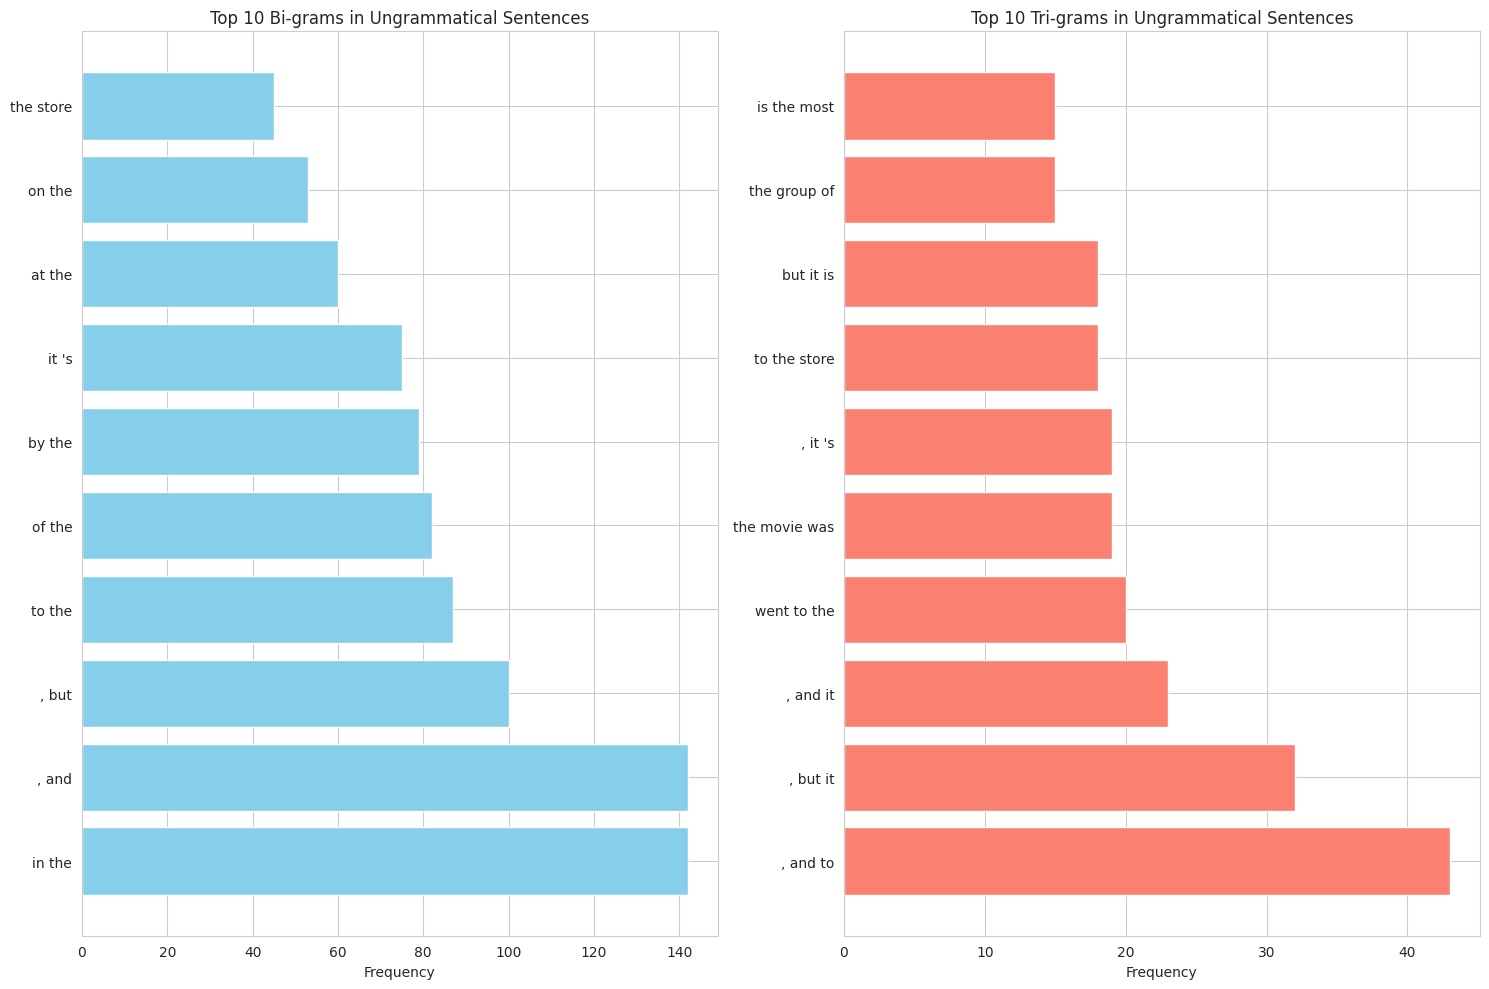

In [26]:
bi_grams, bi_freq = zip(*most_common_bi)
tri_grams, tri_freq = zip(*most_common_tri)

# Convert N-gram tuples to strings
bi_grams_str = [' '.join(gram) for gram in bi_grams]
tri_grams_str = [' '.join(gram) for gram in tri_grams]

plt.figure(figsize=(15, 10))

# Plotting bi-grams
plt.subplot(1, 2, 1)
plt.barh(bi_grams_str, bi_freq, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bi-grams in Ungrammatical Sentences')

# Plotting tri-grams
plt.subplot(1, 2, 2)
plt.barh(tri_grams_str, tri_freq, color='salmon')
plt.xlabel('Frequency')
plt.title('Top 10 Tri-grams in Ungrammatical Sentences')

plt.tight_layout()
plt.show()

In [27]:
from textblob import TextBlob

ungrammatical_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_clean['Ungrammatical Statement']]
corrected_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_clean['Standard English']]

# Calculate average sentiment, compare individual sentence sentiment.
avg_ug_sentiment = sum(ungrammatical_sentiments) / len(ungrammatical_sentiments)
avg_corr_sentiment = sum(corrected_sentiments) / len(corrected_sentiments)

print(f'Average Sentiment for Ungrammatical Sentences: {avg_ug_sentiment}')
print(f'Average Sentiment for Corrected Sentences: {avg_corr_sentiment}')

Average Sentiment for Ungrammatical Sentences: 0.0987968938340592
Average Sentiment for Corrected Sentences: 0.0898120780634406


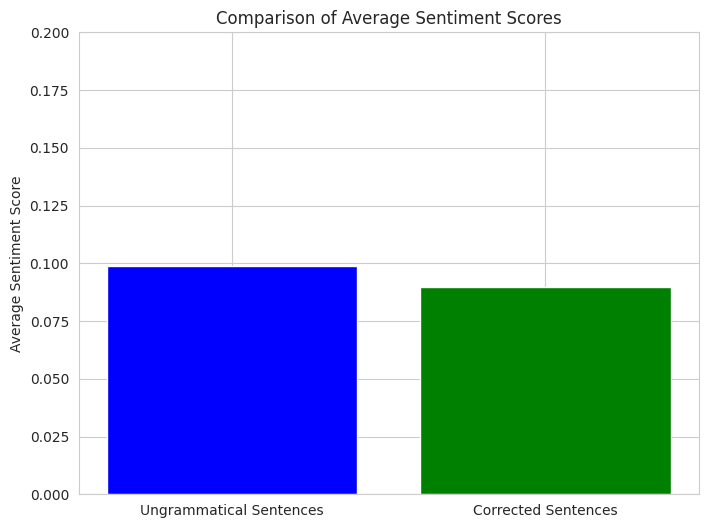

In [28]:
# Sentiment scores
scores = [avg_ug_sentiment, avg_corr_sentiment]
labels = ['Ungrammatical Sentences', 'Corrected Sentences']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Scores')
plt.ylim(0, 0.2)
plt.show()

In [29]:
from nltk import word_tokenize

nltk.download('punkt')

def align_and_find_changes(sentence1, sentence2):
    tokens1 = word_tokenize(sentence1)
    tokens2 = word_tokenize(sentence2)
    max_len = max(len(tokens1), len(tokens2))
    aligned_tokens1 = tokens1 + [''] * (max_len - len(tokens1))
    aligned_tokens2 = tokens2 + [''] * (max_len - len(tokens2))

    changes = []
    for token1, token2 in zip(aligned_tokens1, aligned_tokens2):
        if token1 != token2:
            changes.append((token1, token2))
    return changes

# Apply the function to each pair of sentences
df_clean['Changes'] = df_clean.apply(lambda row: align_and_find_changes(row['Ungrammatical Statement'], row['Standard English']), axis=1)

# View the DataFrame with identified changes
df_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Changes
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]"
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]"
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]"
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]"
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]"


In [30]:
from collections import Counter

# Flatten the list of changes and count the occurrences
all_changes = [change for changes in df_clean['Changes'] for change in changes]
change_counter = Counter(all_changes)

# Display the most common changes
most_common_changes = change_counter.most_common(20)
print("Most Common Changes:")
for change, frequency in most_common_changes:
    print(f"{change}: {frequency}")

Most Common Changes:
('.', ''): 661
('', '.'): 351
('a', 'the'): 63
(',', '.'): 56
(',', 'and'): 46
('was', 'were'): 41
('the', '.'): 41
('but', ''): 41
('the', ''): 40
('it', 'its'): 38
('no', 'any'): 34
('is', ''): 31
('...', ','): 28
('in', 'the'): 25
('it', '.'): 24
(',', 'was'): 22
('the', 'in'): 21
('a', ''): 20
('of', 'the'): 19
('they', 'their'): 19


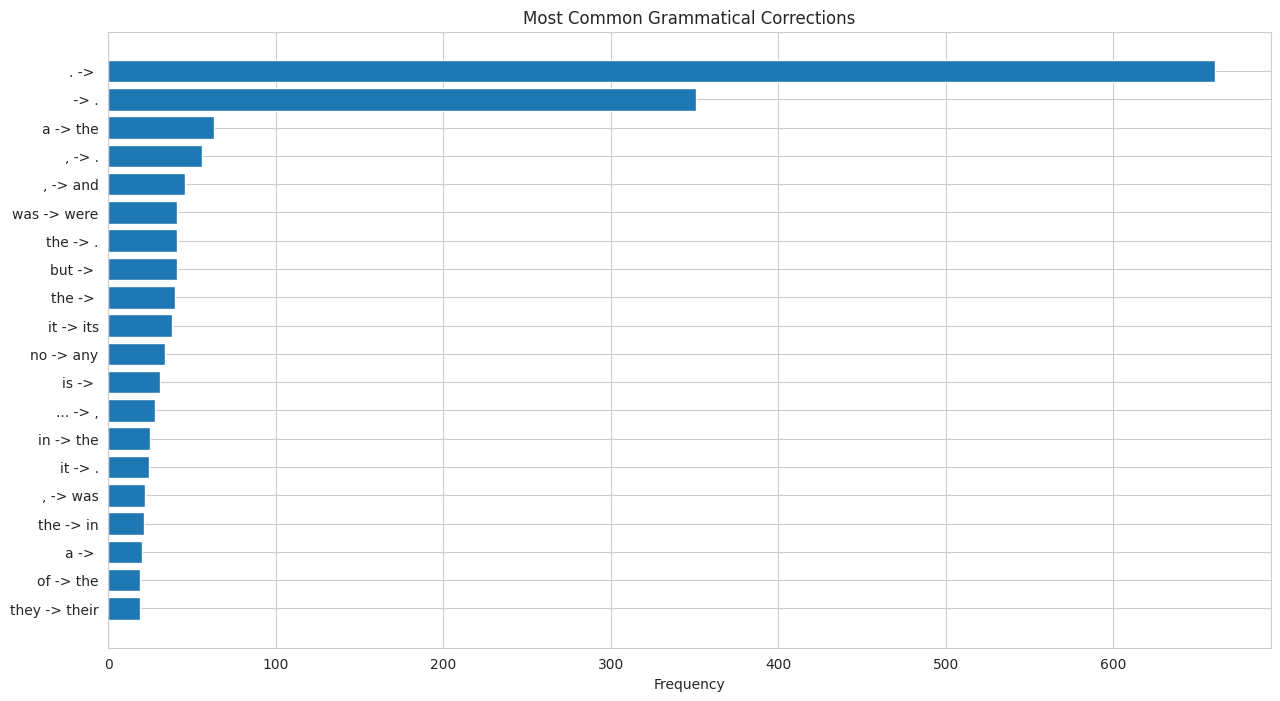

In [31]:
changes, frequencies = zip(*most_common_changes)

# Convert change tuples to string format for labeling
change_labels = [f'{original} -> {corrected}' for original, corrected in changes]


plt.figure(figsize=(15, 8))
plt.barh(change_labels, frequencies)
plt.xlabel('Frequency')
plt.title('Most Common Grammatical Corrections')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()

In [32]:
def categorize_change(change):
    original, corrected = change
    if original == '':
        return 'Insertion'
    elif corrected == '':
        return 'Deletion'
    else:
        return 'Substitution'

df_clean['Change Types'] = df_clean['Changes'].apply(lambda changes: [categorize_change(change) for change in changes])
df_clean.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Changes,Change Types
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]",[Substitution]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]",[Substitution]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]",[Substitution]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]",[Substitution]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]",[Substitution]


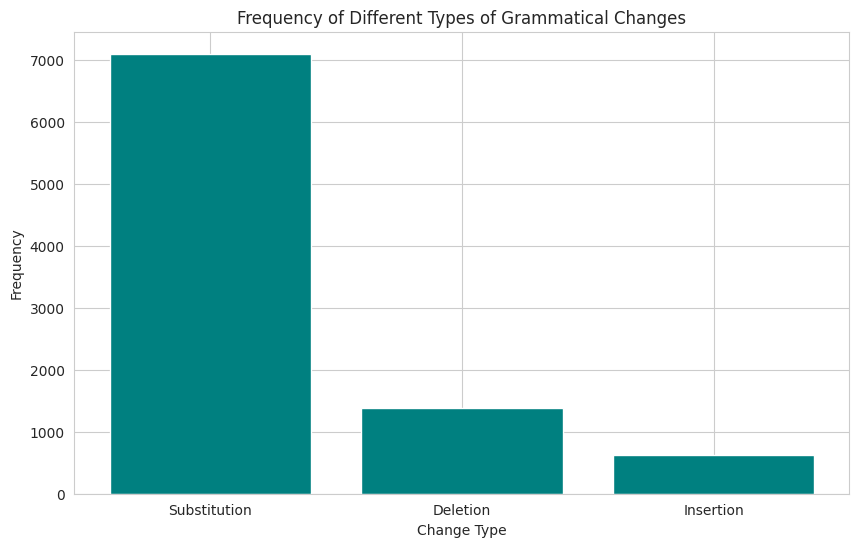

In [33]:
from collections import Counter

change_type_counter = Counter([change_type for change_types in df_clean['Change Types'] for change_type in change_types])

change_types, frequencies = zip(*change_type_counter.items())

plt.figure(figsize=(10, 6))
plt.bar(change_types, frequencies, color='teal')
plt.xlabel('Change Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Grammatical Changes')
plt.show()

In [34]:
context_window = 2

def extract_context(sentence, index, window):
    words = nltk.word_tokenize(sentence)
    start = max(0, index - window)
    end = min(len(words), index + window + 1)
    return ' '.join(words[start:end])

df_clean['Contexts'] = df_clean.apply(lambda row: [extract_context(row['Ungrammatical Statement'], i, context_window) for i, _ in enumerate(nltk.word_tokenize(row['Ungrammatical Statement'])) if (row['Ungrammatical Statement'][i], row['Standard English'][i]) in row['Changes']], axis=1)
df_clean.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Changes,Change Types,Contexts
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]",[Substitution],[]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]",[Substitution],[]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]",[Substitution],[]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]",[Substitution],[]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]",[Substitution],[]


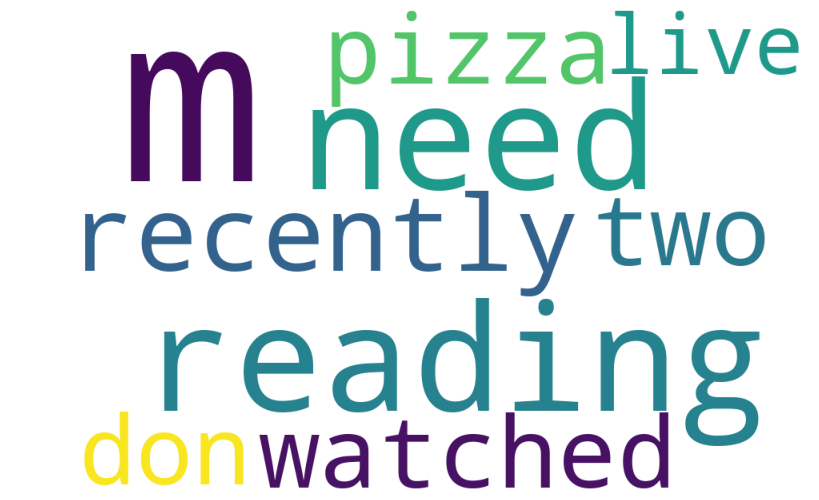

In [35]:
from wordcloud import WordCloud

# Flatten the list of contexts
all_contexts = [context for contexts in df_clean['Contexts'] for context in contexts]

# Join all contexts into a single string
all_contexts_string = ' '.join(all_contexts)

# Create a word cloud
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='white',
                min_font_size = 10).generate(all_contexts_string)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()